# 1.- (Cadena de MARKOV) “Campaña Publicitaria”

Supongamos que existen únicamente tres tipos de bebidas de cola los cuales de notaremos con la marca A (Coca Cola) la marca B (PEPSI) y la marca C (Del Valle) se ha observado a los consumidores y cuando ellos han pedido un refresco de cola se les ha preguntado cuál de ellos habían consumido en su última compra, los resultados de este estudio nos permiten afirmar que un 60 por ciento de aquellos que en su última compra eligieron la marca A han vuelto a comprar esta marca, un 30 de ellos ahora se encuentra consumiendo un refresco de la marca B y un 10 de ellos está consumiendo un refresco de la marca C, de aquellas personas que en su última compra escogieron la marca B un 50 por ciento de ellos sigue consumiendo esa marca, un 30 por ciento de ellos ahora consume un refresco de la marca A y un 20 por ciento de ellos consume un refresco de la marca C, finalmente de aquellos que en su última compra consumieron la marca C un 30 por ciento de ellos sigue prefiriendo esta marca, un 40 por ciento de ellos ahora se encuentra consumiendo un refresco de la marca A y un 30 por ciento de ellos consume un refresco de la marca B.


## DETERMINAR:


A. Supongamos que hay una población de 1000 elementos, determinar las cantidades de población para cada estado con los siguientes datos de distribución inicial marca A=200, B=300 y C=500.

B. Tenemos un país con 50 millones de habitantes y el consumo promedio de refrescos por persona es de 1 litro a la semana, dado que la semana contiene 52 semanas, ¿cuánto será el consumo Anual en litros y cuantos de esos litros corresponden a cada compañía? Grafique este consumo anual por compañía.

C. Cada litro vendido provee una utilidad 0.25 centavos de dólar. Ahora se decide que la marca C ha decidido hacer una campaña de mercadotecnia, esta campaña le asegura que retendrá un 10% más de clientes y se garantiza solo por 1 año, después del término de la campaña lo más probable es que los consumidores regresen a sus hábitos de compra, para esta campaña se tendrán que invertir 20,000,000 de dólares. ¿Determine con evidencias si vale la pena implementar la campaña e invertir esos 20,000,000 de dólares?





Resolver y desarrollar diagrama de estados y matriz de transición etc. etc. y el desarrollo en Python.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
#definimos la matriz inicial con las probabilidades 
a_a=0.6
a_b=0.3
a_c=0.1

b_a=0.3
b_b=0.5
b_c=0.2

c_a=0.4
c_b=0.3
c_c=0.3


M1 = np.array([[a_a, a_b, a_c], [b_a, b_b, b_c], [c_a, c_b, c_c]])

print(M1)

[[0.6 0.3 0.1]
 [0.3 0.5 0.2]
 [0.4 0.3 0.3]]


In [54]:
def SumaFilas(M: np.array) :
    for i in range(M.shape[0]):
        suma = 0
        for j in range(M.shape[1]):
            suma += M[i][j]
            #print(M[i][j])
            suma_redondeada = round(suma, 10)
        print(f"La suma de la fila {i} es {suma_redondeada}")
#si en alguna llega a ser diferente a 1 algo estaria mal
SumaFilas(M1)


La suma de la fila 0 es 1.0
La suma de la fila 1 es 1.0
La suma de la fila 2 es 1.0


In [55]:
def CoincidenColumnas(M: np.array) -> bool:
    for i in range(M.shape[1]):  

        primera_valor = M[0][i]  
        for j in range(1, M.shape[0]):  
            if round(M[j][i], 10) != round(primera_valor, 10):
                return False  
    return True  

CoincidenColumnas(M1)

False

In [56]:
def MultiplicaMatrices(A: np.array, B: np.array) -> np.array:
    C = np.zeros((A.shape[0], B.shape[1]))
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(A.shape[1]):
                C[i][j] += A[i][k] * B[k][j]
    return C


#### A. determinamos las cantidades de población para cada estado con los siguientes datos de distribución inicial marca A=200, B=300 y C=500.

In [57]:

#definimos la poblacion inicial
poblacion_inicial = np.array([200, 300, 500])
poblacion_final = np.dot(M1, poblacion_inicial)


# Mientras no sean iguales, multiplicamos las matrices

while True:
    poblacion_final = np.dot(M1, poblacion_final)
    print(poblacion_final)
    if np.allclose(poblacion_final, np.dot(M1, poblacion_final)):
        print(poblacion_final)
        break


[281. 297. 293.]
[287.  291.4 289.4]
[288.56 289.68 289.04]
[288.944 289.216 289.04 ]
[289.0352 289.0992 289.0544]
[289.05632 289.07104 289.06016]
[289.06112  289.064448 289.061888]
[289.06112  289.064448 289.061888]


#### B. Tenemos un país con 50 millones de habitantes y el consumo promedio de refrescos por persona es de 1 litro a la semana, dado que la semana contiene 52 semanas, ¿cuánto será el consumo Anual en litros y cuantos de esos litros corresponden a cada compañía? Grafique este consumo anual por compañía.

In [58]:
#sacamso la matriz que estan todas las columnas iguales
Mn=MultiplicaMatrices(M1, M1)
contador = 2
titulos = ["Coca Cola", "Pepsi", "Del Valle"]
M1DF = pd.DataFrame(M1, columns=titulos, index=titulos)
MnDF = pd.DataFrame(Mn, columns=titulos, index=titulos)
print(f"Matriz M1 \n{M1DF}")
SumaFilas(M1)

print(f"\n\nMatriz M2 \n{MnDF}")
SumaFilas(Mn)


while not CoincidenColumnas(Mn):
    contador += 1
    print(f"\n\nMatriz M{contador}")
    Mn = MultiplicaMatrices(Mn, M1)
    MnDF = pd.DataFrame(Mn, columns=titulos, index=titulos)
    print(MnDF)
    SumaFilas(Mn)

Matriz M1 
           Coca Cola  Pepsi  Del Valle
Coca Cola        0.6    0.3        0.1
Pepsi            0.3    0.5        0.2
Del Valle        0.4    0.3        0.3
La suma de la fila 0 es 1.0
La suma de la fila 1 es 1.0
La suma de la fila 2 es 1.0


Matriz M2 
           Coca Cola  Pepsi  Del Valle
Coca Cola       0.49   0.36       0.15
Pepsi           0.41   0.40       0.19
Del Valle       0.45   0.36       0.19
La suma de la fila 0 es 1.0
La suma de la fila 1 es 1.0
La suma de la fila 2 es 1.0


Matriz M3
           Coca Cola  Pepsi  Del Valle
Coca Cola      0.462  0.372      0.166
Pepsi          0.442  0.380      0.178
Del Valle      0.454  0.372      0.174
La suma de la fila 0 es 1.0
La suma de la fila 1 es 1.0
La suma de la fila 2 es 1.0


Matriz M4
           Coca Cola   Pepsi  Del Valle
Coca Cola     0.4552  0.3744     0.1704
Pepsi         0.4504  0.3760     0.1736
Del Valle     0.4536  0.3744     0.1720
La suma de la fila 0 es 1.0
La suma de la fila 1 es 1.0
La suma de la fi

El consumo semanal de Cocacola es de 22.65625000116224 millones de litros semanales
El consumo semanal de Pepsi es de 18.74999999987712 millones de litros semanales
El consumo semanal de Del Valle es de 8.59374999896064 millones de litros semanales


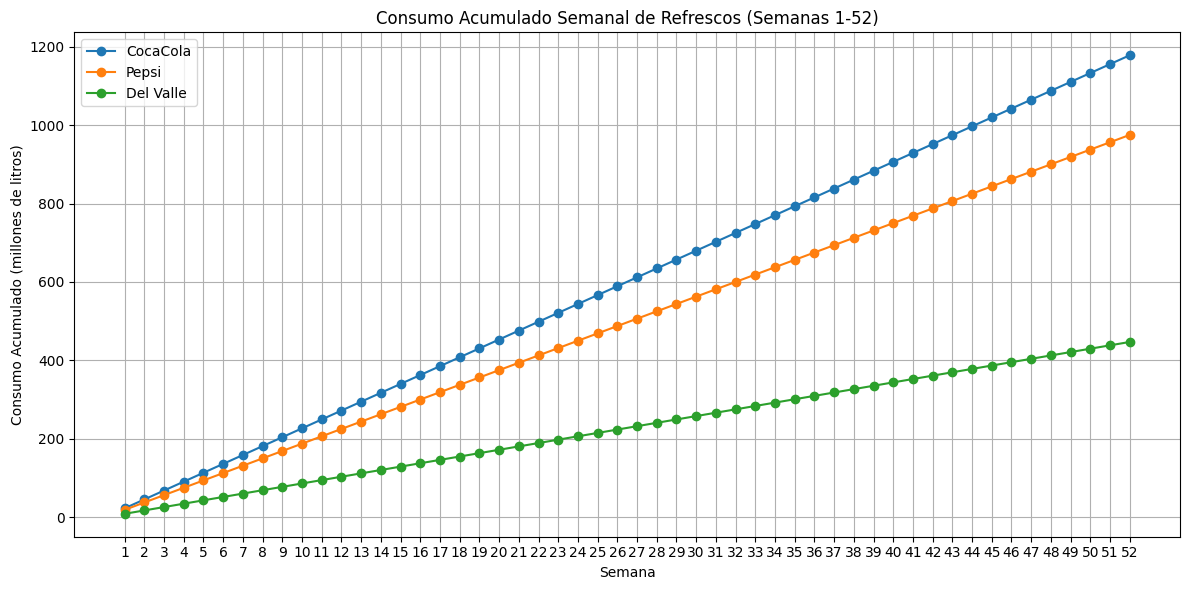

In [59]:
#suponiendo que los datos de una de compra de un refresco a otro son de una semana, podemos usar los datos de la matris transicion para poder sacar el consumo semanal
total_litros_millones=50
total_litros_Cocacola=total_litros_millones*Mn[0][0]
total_litros_Pepsi=total_litros_millones*Mn[0][1]
total_litros_DelValle=total_litros_millones*Mn[0][2]

print(f"El consumo semanal de Cocacola es de {total_litros_Cocacola} millones de litros semanales")
print(f"El consumo semanal de Pepsi es de {total_litros_Pepsi} millones de litros semanales")
print(f"El consumo semanal de Del Valle es de {total_litros_DelValle} millones de litros semanales")

semanas = np.arange(1, 53)
# Inicializar arrays para el consumo acumulativo
consumo_Cocacola_acumulado = np.zeros(semanas.shape)
consumo_Pepsi_acumulado = np.zeros(semanas.shape)
consumo_DelValle_acumulado = np.zeros(semanas.shape)

for i in range(len(semanas)):
    consumo_Cocacola_acumulado[i] = total_litros_Cocacola * (i + 1) 
    consumo_Pepsi_acumulado[i] = total_litros_Pepsi * (i + 1)
    consumo_DelValle_acumulado[i] = total_litros_DelValle * (i + 1)

# Gráfico de consumos acumulativos
plt.figure(figsize=(12, 6))
plt.plot(semanas, consumo_Cocacola_acumulado, label='CocaCola', marker='o')
plt.plot(semanas, consumo_Pepsi_acumulado, label='Pepsi', marker='o')
plt.plot(semanas, consumo_DelValle_acumulado, label='Del Valle', marker='o')

# Configuraciones del gráfico
plt.title('Consumo Acumulado Semanal de Refrescos (Semanas 1-52)')
plt.xlabel('Semana')
plt.ylabel('Consumo Acumulado (millones de litros)')
plt.xticks(semanas)  # Marcas en el eje X para cada semana
plt.grid()
plt.legend()
plt.tight_layout()

# Mostrar la gráfica
plt.show()

#### C. Cada litro vendido provee una utilidad 0.25 centavos de dólar. Ahora se decide que la marca C ha decidido hacer una campaña de mercadotecnia, esta campaña le asegura que retendrá un 10% más de clientes y se garantiza solo por 1 año, después del término de la campaña lo más probable es que los consumidores regresen a sus hábitos de compra, para esta campaña se tendrán que invertir 20,000,000 de dólares. ¿Determine con evidencias si vale la pena implementar la campaña e invertir esos 20,000,000 de dólares?


In [60]:
consumo_anual_del_valle = total_litros_DelValle * 52
utilidad= 0.25

ganancia_anual_del_valle = consumo_anual_del_valle * utilidad
print(f"La ganancia anual de Del Valle es de {ganancia_anual_del_valle} millones de pesos")


La ganancia anual de Del Valle es de 111.71874998648832 millones de pesos


El consumo semanal de Cocacola es de 22.123893804630264 millones de litros semanales
El consumo semanal de Pepsi es de 18.141592920467403 millones de litros semanales
El consumo semanal de Del Valle es de 9.734513274902325 millones de litros semanales


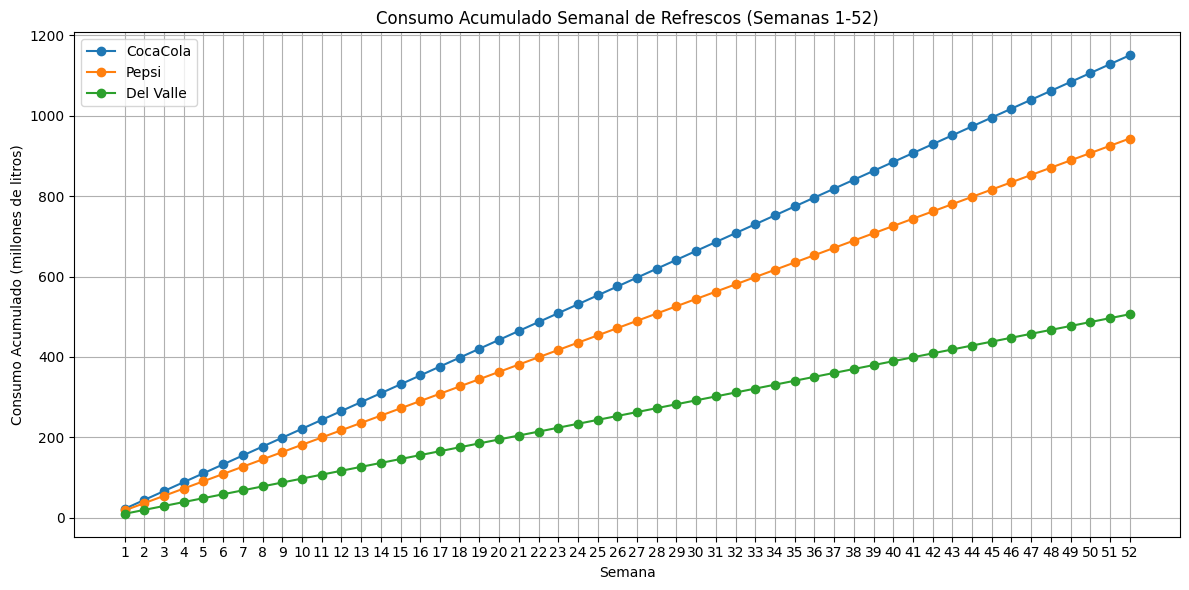

In [61]:
# si asegura que retendra un 10% mas de sus clientes actuales, entonces la matriz seria
#definimos la matriz inicial con las probabilidades 
a_a=0.6
a_b=0.3
a_c=0.1

b_a=0.3
b_b=0.5
b_c=0.2

c_a=0.35 #se le resto un 5%
c_b=0.25 #se le resto un 5%
c_c=0.4  #se le sumo  un 10%


M1 = np.array([[a_a, a_b, a_c], [b_a, b_b, b_c], [c_a, c_b, c_c]])

#haciendo todo de nuevo hasta la grafica 
###################################################################################
#definimos la poblacion inicial
poblacion_inicial = np.array([200, 300, 500])
poblacion_final = np.dot(M1, poblacion_inicial)


# Mientras no sean iguales, multiplicamos las matrices

while True:
    poblacion_final = np.dot(M1, poblacion_final)
    #print(poblacion_final)
    if np.allclose(poblacion_final, np.dot(M1, poblacion_final)):
        #print(poblacion_final)
        break



###################################################################################


#sacamso la matriz que estan todas las columnas iguales
Mn=MultiplicaMatrices(M1, M1)
contador = 2
titulos = ["Coca Cola", "Pepsi", "Del Valle"]
M1DF = pd.DataFrame(M1, columns=titulos, index=titulos)
MnDF = pd.DataFrame(Mn, columns=titulos, index=titulos)
# print(f"Matriz M1 \n{M1DF}")
# SumaFilas(M1)

# print(f"\n\nMatriz M2 \n{MnDF}")
# SumaFilas(Mn)


while not CoincidenColumnas(Mn):
    contador += 1
    # print(f"\n\nMatriz M{contador}")
    Mn = MultiplicaMatrices(Mn, M1)
    MnDF = pd.DataFrame(Mn, columns=titulos, index=titulos)
    # print(MnDF)
    # SumaFilas(Mn)


###################################################################################


#suponiendo que los datos de una de compra de un refresco a otro son de una semana, podemos usar los datos de la matris transicion para poder sacar el consumo semanal
total_litros_millones=50
total_litros_Cocacola=total_litros_millones*Mn[0][0]
total_litros_Pepsi=total_litros_millones*Mn[0][1]
total_litros_DelValle=total_litros_millones*Mn[0][2]

print(f"El consumo semanal de Cocacola es de {total_litros_Cocacola} millones de litros semanales")
print(f"El consumo semanal de Pepsi es de {total_litros_Pepsi} millones de litros semanales")
print(f"El consumo semanal de Del Valle es de {total_litros_DelValle} millones de litros semanales")

semanas = np.arange(1, 53)
# Inicializar arrays para el consumo acumulativo
consumo_Cocacola_acumulado = np.zeros(semanas.shape)
consumo_Pepsi_acumulado = np.zeros(semanas.shape)
consumo_DelValle_acumulado = np.zeros(semanas.shape)

for i in range(len(semanas)):
    consumo_Cocacola_acumulado[i] = total_litros_Cocacola * (i + 1) 
    consumo_Pepsi_acumulado[i] = total_litros_Pepsi * (i + 1)
    consumo_DelValle_acumulado[i] = total_litros_DelValle * (i + 1)

# Gráfico de consumos acumulativos
plt.figure(figsize=(12, 6))
plt.plot(semanas, consumo_Cocacola_acumulado, label='CocaCola', marker='o')
plt.plot(semanas, consumo_Pepsi_acumulado, label='Pepsi', marker='o')
plt.plot(semanas, consumo_DelValle_acumulado, label='Del Valle', marker='o')

# Configuraciones del gráfico
plt.title('Consumo Acumulado Semanal de Refrescos (Semanas 1-52)')
plt.xlabel('Semana')
plt.ylabel('Consumo Acumulado (millones de litros)')
plt.xticks(semanas)  # Marcas en el eje X para cada semana
plt.grid()
plt.legend()
plt.tight_layout()

# Mostrar la gráfica
plt.show()



In [62]:
consumo_anual_del_valle = total_litros_DelValle * 52
utilidad= 0.25

ganancia_anual_del_valle = consumo_anual_del_valle * utilidad
print(f"La ganancia anual de Del Valle es de {ganancia_anual_del_valle} millones de pesos")

La ganancia anual de Del Valle es de 126.54867257373022 millones de pesos


### Como podemos observar la ganancia antes de la inversion de marketing fue de 111.718 millones de pesos y despues de la campaña de maketing fue de 126.548 y si le restamos los 20 millones nos quedarian 116.548 de ganancia, siendo que si le conviene a la compañia hacer esa campaña ya que tendrian una ganacia de 4.83 millones de pesos